# Study colors in Paranal OBS

In [28]:
import sys
sys.path.append("../../")

import pandas as pd
from src.colors import color_paranal as color

import matplotlib.pyplot as plt
import numpy as np


path="../../data/interim/PARANAL/"

## Collect colors by instance
For all OBS csv, the unique colors are extracted and merged in the single pandas ```colors_by_instance```.

In [3]:
FILES=!ls $path | grep OBS

In [4]:
acc=[]

for f in FILES:
    temp_dict={}
    instance=pd.read_csv(path+f)
    instance['color'] = instance['logtext'].apply(color)
    for i, r in instance.iterrows():
        if r['color'] not in temp_dict.keys():
            temp_dict[r['color']] = 1
        else:
            temp_dict[r['color']] += 1
    for k in temp_dict.keys():
        acc.append( {'file': f, 'color': k, 'count': temp_dict[k]} )

colors_by_instance = pd.DataFrame(acc)

## Colors statistics

In [11]:
colors_by_instance

,file,color,count,count-norm
0,GRAVITY-2018-12-15T23:55:02.289Z.OBS.csv,OB started {} {} {}T23 {} {},1,0.007042
1,GRAVITY-2018-12-15T23:55:02.289Z.OBS.csv,OBS NAME GJ65_Dec16 OBS ID {},1,0.007042
2,GRAVITY-2018-12-15T23:55:02.289Z.OBS.csv,GRAVITY_dual_acq GRAVITY Dual Mode Acquisition...,1,0.007042
3,GRAVITY-2018-12-15T23:55:02.289Z.OBS.csv,Started {} {} {}T23 {} {} underlined,1,0.007042
4,GRAVITY-2018-12-15T23:55:02.289Z.OBS.csv,COU AG START F,1,0.007042
...,...,...,...,...
56898,GRAVITY-2018-12-30T00:37:09.554Z.OBS.csv,SETUP expoId {} noExposure function DET1 SEQ1 ...,1,0.007042
56899,GRAVITY-2018-12-30T00:37:09.554Z.OBS.csv,Send command PASTOP process issifControl env w...,1,0.007042
56900,GRAVITY-2018-12-30T00:37:09.554Z.OBS.csv,Waiting timeout {} pending replies command PAS...,1,0.007042
56901,GRAVITY-2018-12-30T00:37:09.554Z.OBS.csv,ACK ABORT red,1,0.007042


In [5]:
# of instances:
len(FILES)

142

In [6]:
# of colors
len(colors_by_instance["color"].unique())

1632

In [7]:
# Normalize by # of instaces
colors_by_instance['count-norm'] = colors_by_instance['count'] / len(FILES)

In [8]:
# Normalized totals by color (AVERAGE!)
norm_total = colors_by_instance[["color", "count-norm"]].groupby(["color"]).sum().sort_values('count-norm', ascending=False)
norm_total

,count-norm
color,
{} SpringGreen4,55.176056
Time {} {},47.915493
Send command SETFIW {} {} {} {} process gvacqControl wgv,15.253521
OK SpringGreen4,14.788732
Send command CONVREL {} Sky AcqCam {} {} {} {} process gvctuControl wgv,12.669014
...,...
GRAVITY_single_obs_exp ORIGFILE GRAVITY_PARALLEL_SKY358_0039 fits INS FDDL WINDOW {} INS FDDL DELAY {} {} INS DET2 GAIN {} {} INS DET3 GAIN {} {} INS DET2 QE,0.007042
GRAVITY_single_obs_exp ORIGFILE GRAVITY_PARALLEL_SKY358_0052 fits INS FDDL WINDOW {} INS FDDL DELAY {} {} INS DET2 GAIN {} {} INS DET3 GAIN {} {} INS DET2 QE,0.007042
GRAVITY_single_obs_exp ORIGFILE GRAVITY_PARALLEL_SKY358_0054 fits INS FDDL WINDOW {} INS FDDL DELAY {} {} INS DET2 GAIN {} {} INS DET3 GAIN {} {} INS DET2 QE,0.007042


In [9]:
# Filtering total above THRESHOLD_MIN_AVG_COUNT
THRESHOLD_MIN_AVG_COUNT = 0.1
norm_total[ norm_total['count-norm'] >= THRESHOLD_MIN_AVG_COUNT ]

,count-norm
color,
{} SpringGreen4,55.176056
Time {} {},47.915493
Send command SETFIW {} {} {} {} process gvacqControl wgv,15.253521
OK SpringGreen4,14.788732
Send command CONVREL {} Sky AcqCam {} {} {} {} process gvctuControl wgv,12.669014
...,...
SCI_SOri_2 OBS OBSERVER UNKNOWN OBS PI COI ID {} OBS PI COI NAME UNKNOWN OBS PROG ID {} D {} A OBS STREHLRATIO {} {} OBS TARG NAME SOri OBS TWILIGHT,0.105634
SepTracking ON blue,0.105634
ADDFITS expoId {} detId NGCIR1 info INS POLA MODE SPLIT FT POLA MODE SPLIT INS SPEC RES MEDIUM FT RATE {} {} EXPTIME {} DATE OBS {} {} {}T01 {} {} TPL NAME,0.105634


In [10]:
#colors_by_instance[["color", "count"]].groupby(["color"]).median().sort_values('count', ascending=False)[:50]

## Plots

/Users/jgil/logdelay/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  


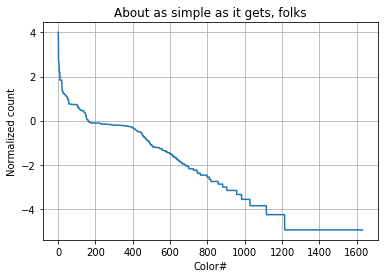

In [29]:
fig, ax = plt.subplots()
ax.plot( np.log(norm_total).get_values())

ax.set(xlabel='Color#', ylabel='Normalized count',
       title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()
